## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import scipy.stats as linregress

# Study data files
mouse_metadata_path = "C:\\Users\\shane\\Downloads\\mouse_metadata.csv"
study_results_path = "C:\\Users\\shane\\Downloads\\study_results.csv"

# Read the mouse data 
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
# Read the study results
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


# Combine the above data into a single dataset


In [3]:
# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

In [4]:
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
num_mice = combined_df["Mouse ID"].nunique()
num_mice

249

# Remove Duplicate:
* Before beginning the analysis, check the data for any mouse ID with duplicate time points and remove any data associated with that mouse ID.


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"], keep="first"), "Mouse ID"].unique()
dup_mice


array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
#Duplicate Needs to be displayed
dup_mice = combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"], keep="first")]
dup_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df['Mouse ID'].isin(dup_mice)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.
num_mice2 = clean_df["Mouse ID"].nunique()
num_mice2

249

## Summary Statistics

* Use the cleaned data for the remaining steps.

* Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean,
mean_tumor_volume = clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
#median,
median_tumor_volume = clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
#variance,
variance_tumor_volume = clean_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
#standard deviation,
std_tumor_volume = clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
#SEM 
sem_tumor_volume = clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

In [11]:
# Assemble the stat summary resulting series into a single summary dataframe.

summary_stat = pd.DataFrame({"Mean Tumor Volume":mean_tumor_volume, 
                            "Median Tumor Volume":median_tumor_volume, 
                           "Tumor Volume Variance":variance_tumor_volume, 
                           "Tumor Volume Std. Dev.":std_tumor_volume, 
                           "Tumor Volume Std. Err.":sem_tumor_volume})
summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_agg =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts
* Generate a bar plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows  the number of total mice for each treatment regimen throughout the course of the study.

  * **NOTE:** These plots should look identical.


In [13]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
#Creating Groupby object for graphs
mice_count = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
mice_count = mice_count.sort_values(ascending=False)
mice_count = mice_count.reindex()

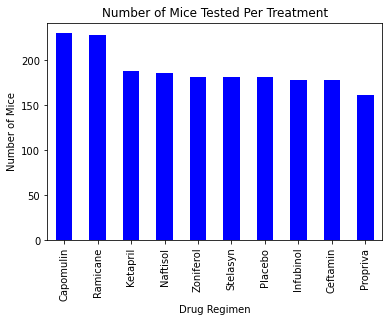

In [14]:
#Pandas bar chart
bar_df = mice_count.plot.bar(color='b')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice Tested Per Treatment")
#bar_plot = drugs.plot(kind="bar", title="Number of Mice Tested Per Drug Regimen")
bar_df

<function matplotlib.pyplot.show(*args, **kw)>

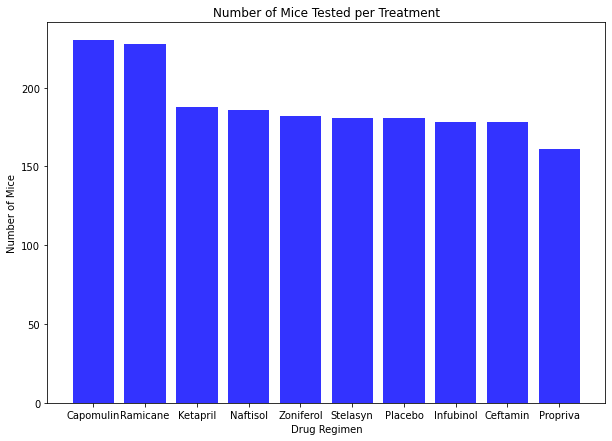

In [15]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

#Matplotlib chart using groupby object
x_axis = mice_count.index.values
y_axis = mice_count.values
fig1, ax1 = plt.subplots(figsize=(10, 7))
plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show

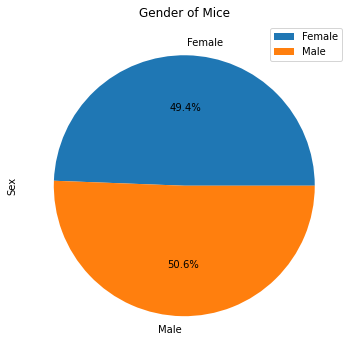

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = clean_df.groupby("Sex")

gender_count_df = pd.DataFrame(gender_group["Sex"].count())

gender_count_plot = gender_count_df.plot(kind="pie", y="Sex", figsize=(6, 6), autopct="%1.1f%%", title="Gender of Mice")
gender_count_plot

<ipython-input-17-2eb3049119ef>:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(gender_count_df, labels=gender, autopct="%1.1f%%", startangle=140)


Text(0.5, 1.0, 'Gender of Mice')

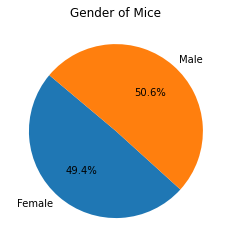

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ["Female", "Male"]

plt.pie(gender_count_df, labels=gender, autopct="%1.1f%%", startangle=140)
plt.title("Gender of Mice")

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
keeps = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

drug_keeps = clean_df[clean_df["Drug Regimen"].isin(keeps)]

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = drug_keeps.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_timepoint = greatest_timepoint.merge(clean_df, on= ["Mouse ID", "Timepoint"], how="left")
merge_timepoint.head()                                                         

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = clean_df["Drug Regimen"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in keeps:
    quartiles = clean_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

for tumor_volumes in keeps:
    tumor_volumes = drug_keeps["Tumor Volume (mm3)"]
    tumor_data.append(tumor_volumes)

    # add subset 

drug_volume = {"Drug Treatments": keeps,
               "Tumor Volume": tumor_data}

drug_volume_df = pd.DataFrame(list(drug_volume.items()), columns = ["Drug Treatments", "Tumor Volume"])
drug_volume_df.head()
    
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Tumor Volumes below {lower_bound} could be outliers.")
print(f"Tumor Volumes above {upper_bound} could be outliers.")

outlier_volume = clean_df.loc[(clean_df["Tumor Volume (mm3)"] < lower_bound) | (clean_df["Tumor Volume (mm3)" ] > upper_bound)]
outlier_volume.head()

The lower quartile of Tumor Volume is: 45.0
The upper quartile of Tumor Volume is: 56.29220039
The interquartile range of Tumor Volume is: 11.292200389999998
Tumor Volumes below 28.061699415000003 could be outliers.
Tumor Volumes above 73.230500975 could be outliers.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


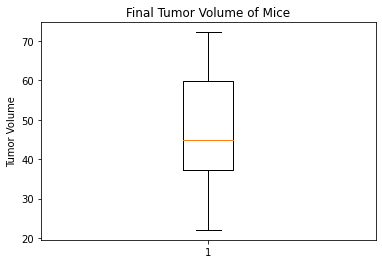

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_volume = merge_timepoint["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots()
ax1.boxplot(final_volume)
ax1.set_title("Final Tumor Volume of Mice")
ax1.set_ylabel("Tumor Volume")
plt.show()

## Line and Scatter Plots

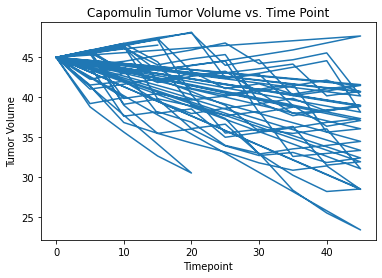

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = drug_keeps.loc[(clean_df["Drug Regimen"] == "Capomulin"), :]

cap_timepoint = capomulin["Timepoint"]
cap_volume = capomulin["Tumor Volume (mm3)"]

volume_time, = plt.plot(cap_timepoint, cap_volume)

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.title("Capomulin Tumor Volume vs. Time Point")
plt.show()

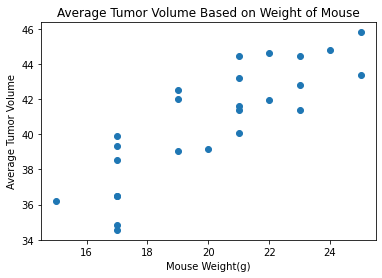

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_group = capomulin.groupby(capomulin["Mouse ID"])

avg_volume = capomulin_group["Tumor Volume (mm3)"].mean().astype(float)

mouse_weight = capomulin_group["Weight (g)"].mean().astype(float)

plt.scatter(mouse_weight, avg_volume)
plt.xlabel("Mouse Weight(g)")
plt.ylabel("Average Tumor Volume")
plt.title("Average Tumor Volume Based on Weight of Mouse")
plt.show()

## Correlation and Regression

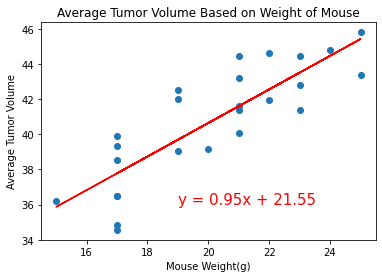

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, avg_volume)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, avg_volume)
plt.plot(mouse_weight, regress_values, "r-")
plt.annotate(line_eq,(19,36),fontsize=15,color="red")
plt.xlabel("Mouse Weight(g)")
plt.ylabel("Average Tumor Volume")
plt.title("Average Tumor Volume Based on Weight of Mouse")
plt.show()